Loaded 10 columns.
Columns: ['X' 'Time' 'PopBio' 'Temp' 'Time_units' 'PopBio_units' 'Species' 'Medium'
 'Rep' 'Citation']
Missing values per column:
 Time            0
PopBio          0
Temp            0
Time_units      0
PopBio_units    0
Species         0
Medium          0
Rep             0
Citation        0
dtype: int64
Number of duplicate rows: 10
Unique experiment IDs: 285
Selected experiment data:
                                                  ID        Time    PopBio  \
0  Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Z...  669.879518  0.283276   
1  Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Z...  646.987952  0.283342   
2  Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Z...  622.891566  0.285151   
3  Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Z...  597.590361  0.281746   
4  Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Z...  574.698795  0.273117   

   Temp Time_units PopBio_units                      Species Medium  Rep  \
0     5      Hours       OD_595  Chryseobacteriu

/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


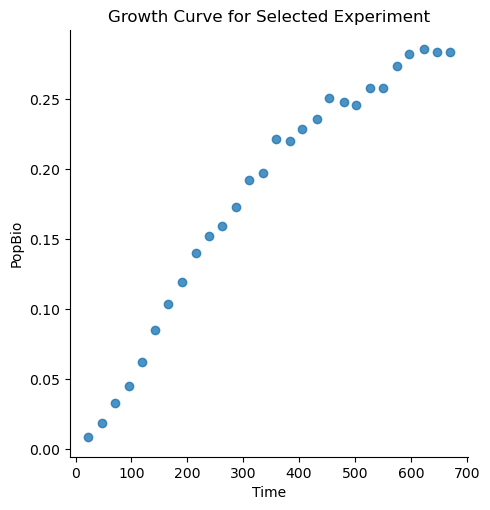

/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


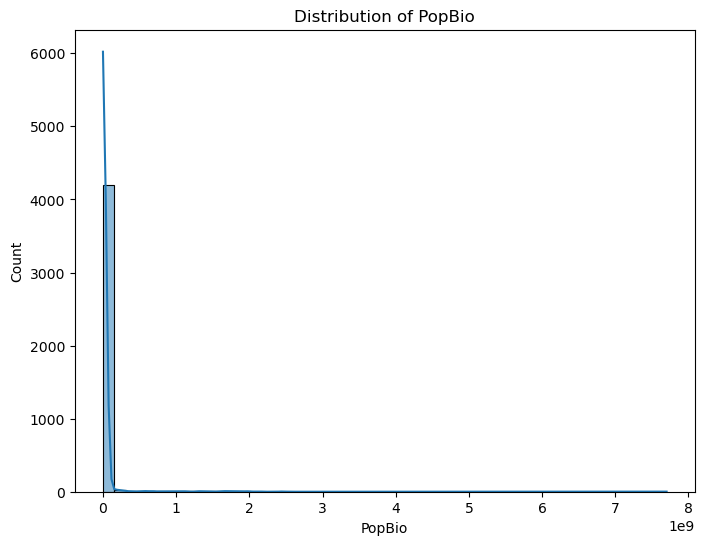

Cleaned data saved as 'LogisticGrowthData_Cleaned.csv'.


In [1]:
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load data
data_path = "../data/LogisticGrowthData.csv"
meta_path = "../data/LogisticGrowthMetaData.csv"

data = pd.read_csv(data_path)
metadata = pd.read_csv(meta_path, header=None, names=["Column", "Description"])

print("Loaded {} columns.".format(len(data.columns.values)))
print("Columns:", data.columns.values)

# Data cleaning

# Remove unnecessary column 'X' if it exists
if "X" in data.columns:
    data.drop(columns=["X"], inplace=True)

# Handle missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Remove negative values
data = data[(data["Time"] >= 0) & (data["PopBio"] >= 0)]

# Detect and remove extreme low values using IQR method
Q1 = data["PopBio"].quantile(0.25)
Q3 = data["PopBio"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
data = data[data["PopBio"] >= lower_bound]

# Standardize categorical variable formats
data["Species"] = data["Species"].str.strip().str.replace(" +", " ", regex=True)
data["Medium"] = data["Medium"].str.strip().str.replace(" +", " ", regex=True)
data["PopBio_units"] = data["PopBio_units"].str.strip().str.upper()
data["Time_units"] = data["Time_units"].str.strip().str.capitalize()

# Remove duplicate rows
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)
data = data.drop_duplicates()

# Generate unique experiment ID
data.insert(0, "ID", data.Species + "_" + data.Temp.map(str) + "_" + data.Medium + "_" + data.Citation)

# Display unique experiment count
print("Unique experiment IDs:", data.ID.nunique())

# Select data for a specific experiment
selected_id = "Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080."
data_subset = data[data["ID"] == selected_id]

print("Selected experiment data:")
print(data_subset.head())

# Data visualization

# Growth curve
sns.lmplot(x="Time", y="PopBio", data=data_subset, fit_reg=False)
plt.title("Growth Curve for Selected Experiment")
plt.show()

# Distribution of 'PopBio'
plt.figure(figsize=(8, 6))
sns.histplot(data["PopBio"], bins=50, kde=True)
plt.title("Distribution of PopBio")
plt.xlabel("PopBio")
plt.ylabel("Count")
plt.show()

# Save cleaned data
data.to_csv("../data/LogisticGrowthData_Cleaned.csv", index=False)
print("Cleaned data saved as 'LogisticGrowthData_Cleaned.csv'.")

/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


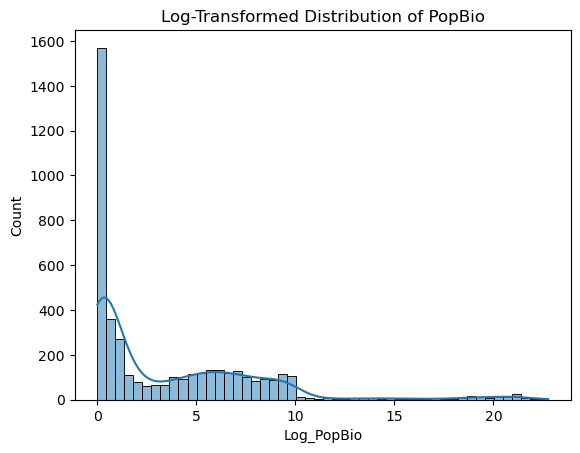

/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


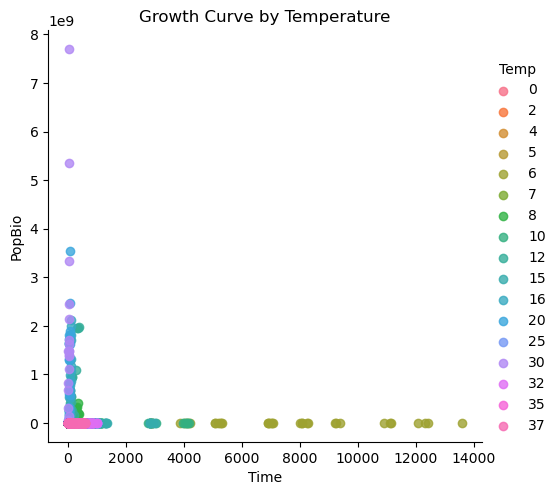

In [2]:
data["Log_PopBio"] = np.log1p(data["PopBio"])
sns.histplot(data["Log_PopBio"], bins=50, kde=True)
plt.title("Log-Transformed Distribution of PopBio")
plt.show()
sns.lmplot(x="Time", y="PopBio", hue="Temp", data=data, fit_reg=False)
plt.title("Growth Curve by Temperature")
plt.show()


/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


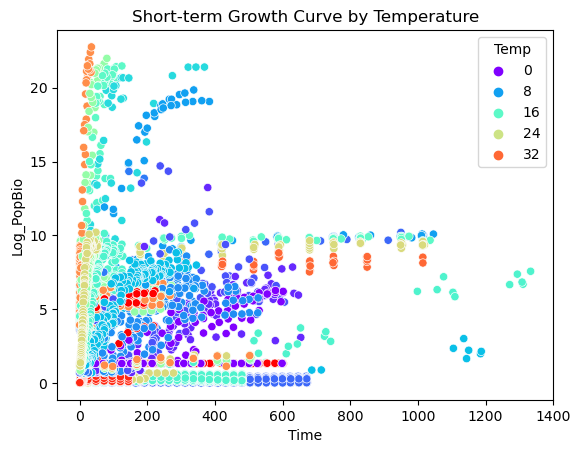

In [3]:
data_filtered = data[data["Time"] < 2000]
sns.scatterplot(x="Time", y="Log_PopBio", hue="Temp", data=data_filtered, palette="rainbow")
plt.title("Short-term Growth Curve by Temperature")
plt.show()

/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

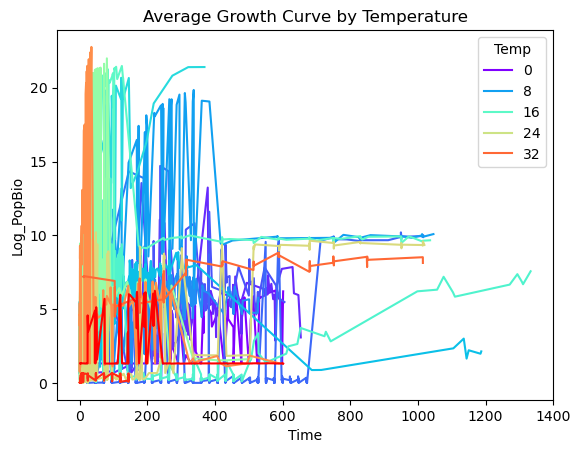

/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/auroraliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

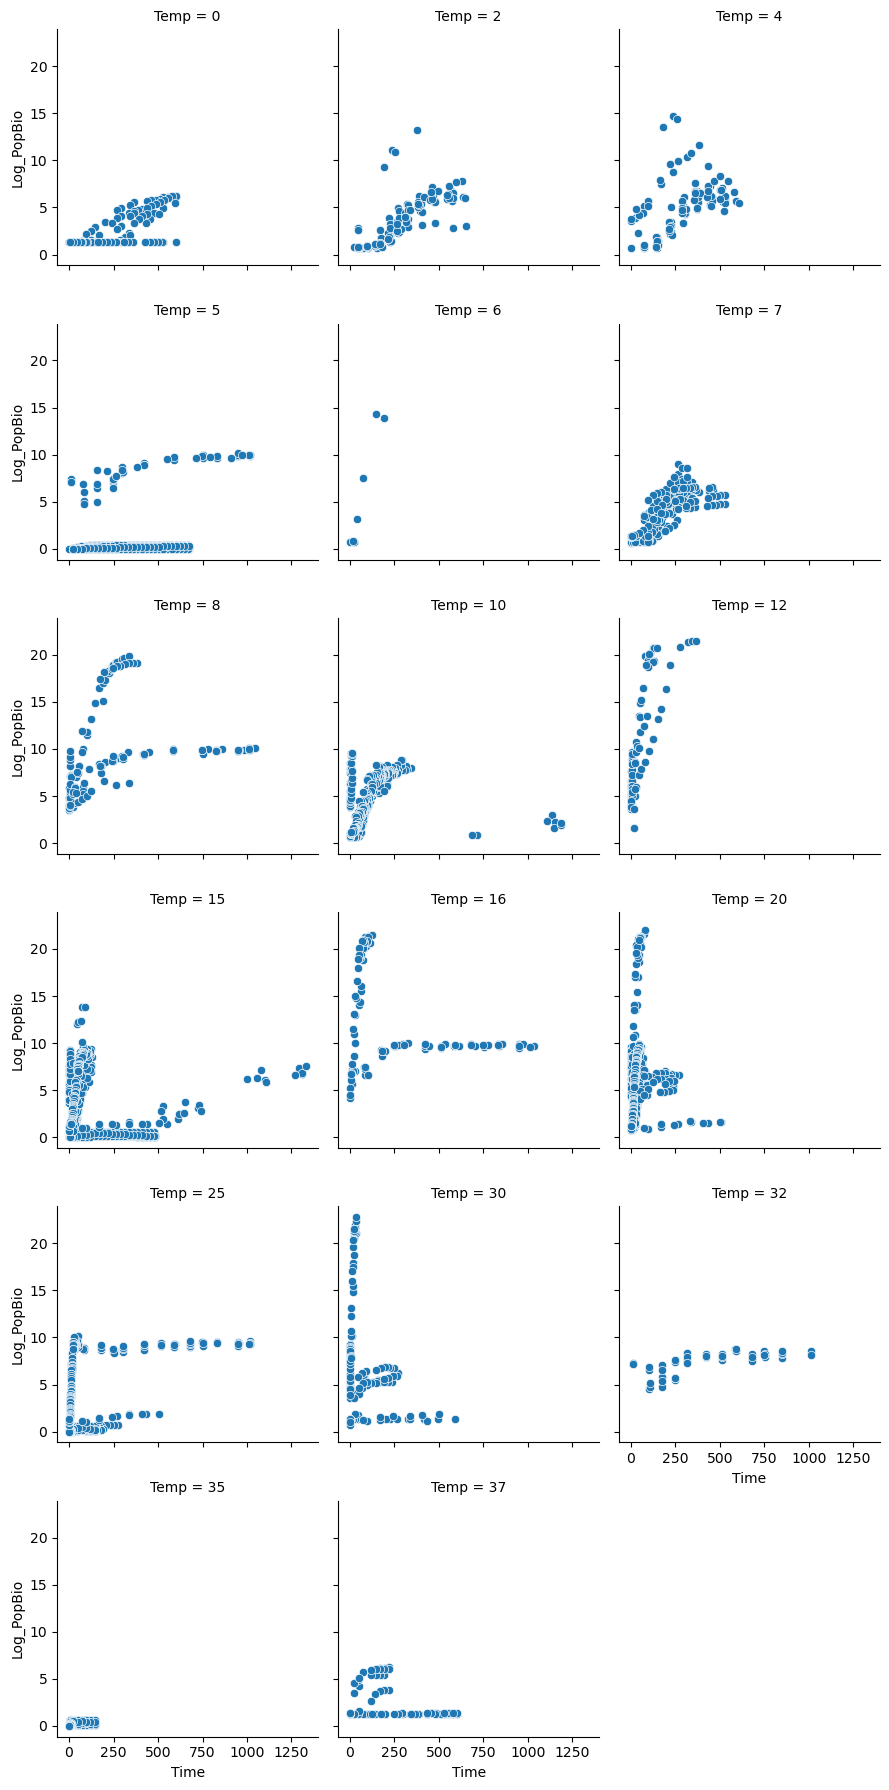

In [4]:
import numpy as np

# Calculate the mean at different temperatures at each point in time
data_avg = data_filtered.groupby(["Time", "Temp"])["Log_PopBio"].mean().reset_index()

# plot growth curve
sns.lineplot(x="Time", y="Log_PopBio", hue="Temp", data=data_avg, palette="rainbow")
plt.title("Average Growth Curve by Temperature")
plt.show()
g = sns.FacetGrid(data_filtered, col="Temp", col_wrap=3, height=3)
g.map_dataframe(sns.scatterplot, x="Time", y="Log_PopBio")
plt.show()
